Reproduce Fig. 5, comparing the C_ell reconstructed from power spectra and correlation functions and their signal to noise.

In [1]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid1916/


In [2]:
test=False #if true, run test case to make sure code runs.

In [3]:
nside=1024
if test:
    nside=64
    
use_window=True
unit_window=False

do_pseudo_cl=True
do_xi=True

bin_cl=True
bin_xi=True

use_binned_l=True
use_binned_theta=True

store_win=True

do_cov=True

In [4]:
#setup tomographic bins
z0=1
shear_zbins=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=nside,f_sky=f_sky,unit_win=unit_window)
galaxy_zbins=shear_zbins

ns0:  27.0
[0.10002    0.10082016 0.10162032 ... 2.99819964 2.9989998  2.99979996] 100 5
source_tomo_bins, zmax 5.0 2.999799959991998 0.5999699939987997
Tracer utils has no tracers
Tracer utils has tracers:  ['galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 273 3072 31.0 10
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:92: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:115: RuntimeWarning: divide by zero encountered in true_divide


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary


/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)
/verafs/scratch/phy200040p/sukhdeep/project/skylens/skylens/survey_utils.py:132: RuntimeWarning: invalid value encountered in sqrt
  shear_zbins[i]['window_N']=np.sqrt(sh

In [5]:
corrs=[corr_gg]#corr_ll,corr_gg,corr_ggl]

In [6]:
bi=(0,0)
corr=corrs[0]
s=s1_s2s[corr]
if corr==corr_ll:
    s=(2,-2)

In [7]:
#setup parameters
lmax_cl=1024 #2000
lmin_cl=0
if test:
    lmax_cl=nside
l0=np.arange(lmin_cl,lmax_cl)

window_lmax=lmax_cl*2

lmin_cl_Bins=lmin_cl+2
lmax_cl_Bins=lmax_cl-10
Nl_bins=30
if test:
    Nl_bins=10
# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=1)#,binning_mode='decreasing')
# l_bins=l_bins[l_bins<=lmax_cl_Bins]
# l_bins0=l_bins*1.
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
dl=(l_bins[1:]-l_bins[:-1])
lb_cl=lb*1.
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [8]:
Skylens_kwargs=parse_dict(locals())

Skylens_kwargs['do_pseudo_cl']=True
Skylens_kwargs['do_xi']=False
SL_cl0=Skylens(**Skylens_kwargs)

Skylens_kwargs_nW=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_nW['use_window']=False
Skylens_kwargs_nW['do_cov']=True
SL_cl0_nW=Skylens(**Skylens_kwargs_nW)
SL_cl0_nW.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1024 2049.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 28 2049.0 2
Window done. Size: 0.0
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
set binned measure done
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 1024 2049.

In [9]:
#setup parameters
lmax_cl=3*nside-1 #5000
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

window_lmax=min(lmax_cl,3*nside-1)

lmin_cl_Bins=lmin_cl+2
lmax_cl_Bins=lmax_cl-10
Nl_bins2=10
if test:
    Nl_bins2=10
l_bins0=l_bins*1.
l_bins2=np.unique(np.int64(np.logspace(np.log10(l_bins0.max()),np.log10(lmax_cl_Bins),Nl_bins2+1)))
l_bins=np.unique(np.append(l_bins,l_bins2))

# l_bins=get_l_bins(l_min=lmin_cl_Bins,l_max=lmax_cl_Bins,N_bins=Nl_bins,binning_scheme='log',min_modes=50)#,binning_mode='decreasing')
# l_bins=l_bins[l_bins<=lmax_cl_Bins]
# l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins+1)))
lb=.5*(l_bins[1:]+l_bins[:-1])
lb_xi=lb*1.
l_bins_center=lb*1
Nl_bins=len(lb)

# l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell
l=l0

In [10]:
do_xi=True

theta_min=0.01/60
# theta_min=hp.nside2resol(512, arcmin = True)/60 #100/nside #1./60
theta_max=100. #1200./60
n_theta_bins=101
if test:
    n_theta_bins=15
# theta_bins,th=get_theta_bins(theta_min=theta_min,theta_max=theta_max,N_bins=n_theta_bins,binning_scheme='log',n_theta_samples=40)#,max_modes=1)
theta_bins=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins+1)
th=np.logspace(np.log10(theta_min),np.log10(theta_max),n_theta_bins*50)
th0=th*1.
theta_bins_center=0.5*(theta_bins[1:]+theta_bins[:-1])
thb=theta_bins_center*1
n_theta_bins=len(thb)

#Hankel Transform setup
WT_kwargs={'l':l0,'l_cut_weights':np.ones_like(l0),'theta':th*d2r,'s1_s2':[(0,0),s],#[(2,2),(2,-2),(0,0)],
                      'wig_d_taper_order_low':None,'wig_d_taper_order_high':None}
#            'wig_d_taper_order_low':16,'wig_d_taper_order_high':20}
# if globals().get('WT') is None:
WT=wigner_transform(**WT_kwargs )
# WT_b=wigner_transform(**WT_kwargs)
WT_b=WT
WT.gather_data()

Scattering WT data 1


In [11]:
Skylens_kwargs=parse_dict(locals())
Skylens_kwargs['do_pseudo_cl']=False
Skylens_kwargs['do_cov']=False
SL_xi0=Skylens(**Skylens_kwargs)
SL_xi0.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 38 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.00020956993103027

In [12]:
Skylens_kwargs_ub=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_ub['use_binned_l']=False
Skylens_kwargs_ub['use_binned_theta']=False
Skylens_kwargs_ub['do_cov']=True
SL_xi0_ub=Skylens(**Skylens_kwargs_ub)
SL_xi0_ub.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
scatter dict was passed a future, gathering and re-scattering l_cl
scatter dict was passed a future, gathering and re-scattering l_cl
set window_cl: cl0,cl_b done 0.0001914501190185547
set window_cl: cl done 3.0750515460968018 555.353 0.001
Win_cli ('galaxy', 'galaxy', 0, 0) ('galaxy', 'galaxy') (0, 0)
set window_cl: cl done 3.743171215057373 555.353 0.001
cl+cov bags done 1 1 4.312705039978027
set_window_cl: Win_cov size:  2448.291
set_window_cl done 447.90672183036804
Got xi win graph
Window done. Size: 2448.381
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary
gather_dict got empty dictionary


In [13]:
Skylens_kwargs_nW=copy.deepcopy(Skylens_kwargs)
Skylens_kwargs_nW['use_window']=False
Skylens_kwargs_nW['do_cov']=False
SL_xi0_nW=Skylens(**Skylens_kwargs_nW)
SL_xi0_nW.gather_data()

Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 38 3072.0 2
Window done. Size: 0.0
Tracer utils has tracers:  ['shear', 'galaxy']
pk_params dict was none, intialized with default
cosmo_params dict was none, intialized with default
cosmology interpolation range 0.0 4.005
power spectra camb_pk_too_many_z
Win gen: step size 100 3071 3072.0 2
Window done. Size: 0.0
scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 328.539
scatter_dict got empty dictionary
cl graph done

In [14]:
cl_bu=client.gather(SL_xi0_ub.cl_bin_utils)
xi_bu=client.gather(SL_xi0_ub.xi_bin_utils)

In [15]:
%time xiHG0=SL_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()
%time xi0=client.compute(xiHG0['xi']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 613.215
CPU times: user 25.7 s, sys: 3.22 s, total: 28.9 s
Wall time: 6.54 s
CPU times: user 544 ms, sys: 4.14 s, total: 4.68 s
Wall time: 6.74 s
CPU times: user 111 ms, sys: 616 ms, total: 727 ms
Wall time: 1.07 s


In [16]:
%time xiHG0_ub=SL_xi0_ub.xi_tomo()
%time xiH0_ub=xiHG0_ub['stack'].compute()
%time xi0_ub=client.compute(xiHG0_ub['xi']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
Done xi graph 0.000847 613.264
CPU times: user 27.6 s, sys: 4.74 s, total: 32.3 s
Wall time: 10.2 s
CPU times: user 1.26 s, sys: 9.59 s, total: 10.9 s
Wall time: 22.3 s
CPU times: user 127 ms, sys: 811 ms, total: 938 ms
Wall time: 1.55 s


In [17]:
%time xiHG0_nW=SL_xi0_nW.xi_tomo()
%time xiH0_nW=xiHG0_nW['stack'].compute()
%time xi0_nW=client.compute(xiHG0_nW['xi']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
Done xi graph 0.000847 613.24
CPU times: user 24.4 s, sys: 3.28 s, total: 27.7 s
Wall time: 6.8 s
CPU times: user 505 ms, sys: 3.65 s, total: 4.15 s
Wall time: 5.73 s
CPU times: user 114 ms, sys: 650 ms, total: 764 ms
Wall time: 1.14 s


In [18]:
%time clG0_nW=SL_cl0_nW.cl_tomo()
%time cl0_nW=client.compute(clG0_nW['cl_b']).result()
%time pcl0_nW=client.compute(clG0_nW['stack']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
CPU times: user 24.9 s, sys: 987 ms, total: 25.9 s
Wall time: 1.8 s
CPU times: user 66.8 ms, sys: 356 ms, total: 422 ms
Wall time: 718 ms
CPU times: user 268 ms, sys: 1.45 s, total: 1.72 s
Wall time: 2.82 s


In [19]:
%time xi_clG0_ub=SL_xi0_ub.cl_tomo()
%time xi_cl0_ub=client.compute(xi_clG0_ub['cl']).result()


scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
CPU times: user 321 ms, sys: 1.8 s, total: 2.12 s
Wall time: 3.84 s
CPU times: user 78.8 ms, sys: 342 ms, total: 421 ms
Wall time: 700 ms


In [20]:
%time xi_clG0=SL_xi0.cl_tomo()
%time xi_cl0=client.compute(xi_clG0['cl']).result()
# %time xi_pcl0=client.compute(xi_clG0['stack']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
CPU times: user 176 ms, sys: 814 ms, total: 990 ms
Wall time: 1.86 s
CPU times: user 70.5 ms, sys: 365 ms, total: 436 ms
Wall time: 699 ms


In [21]:
xi_cl0_ub[corr][bi].shape

(3071,)

In [22]:
%time clG0=SL_cl0.cl_tomo()
%time cl0=client.compute(clG0['cl_b']).result()
%time pcl0=client.compute(clG0['stack']).result()
# %time pcl0_cov=client.compute(clG0['cov']).result()

# %time cl0_0=client.compute(clG0['cl']).result()

scatter_dict got empty dictionary
cl graph done
gather_dict got empty dictionary
cl cov graph done
CPU times: user 25 s, sys: 1.05 s, total: 26 s
Wall time: 1.76 s
CPU times: user 16 ms, sys: 1.82 ms, total: 17.8 ms
Wall time: 34.6 ms
CPU times: user 169 ms, sys: 540 ms, total: 709 ms
Wall time: 1.19 s


In [23]:
win=SL_cl0.Win
M_cl=win['cl'][corr][bi]['M']
Mi_cl=np.linalg.pinv(M_cl)

In [24]:
Wi=SL_xi0.inv_WT_binned[corr][s][bi].result()

In [25]:
l0c=np.arange(lmax_cl)
window_l_test=np.arange(lmax_cl)
wl0c=window_l_test
wu=window_utils(l=l0c,window_l=window_l_test,use_window=True,s1_s2s={corr:s},
                corrs=corrs,wigner_step=100,wigner_files=wigner_files,bin_window=False)
wu.set_wig3j()

Win gen: step size 100 3071 3071.0 10
wigner_files: {0: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/dask_wig3j_l5000_w5000_0_reorder.zarr', 2: '/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp//dask_wig3j_l2200_w4400_2_reorder.zarr'}
wigner done dict_keys([])


In [26]:
thc=0.01
l_smooth_min=500
l_smooth_max=1000

In [27]:
x=th0*60>thc
xi_t=np.ones_like(th0)
xi_t[~x]=0

l_inv,wl_inv=WT.inv_projected_correlation(theta_xi=th0*d2r,wig_theta=th0*d2r,xi=xi_t,
                                              s1_s2=s,wig_d=WT.wig_d[s].T,wig_norm=WT.inv_wig_norm)
x=l_inv<l_smooth_min
x2=l_inv<l_smooth_max
x=x*x2
wl_inv[~x]*=np.cos((l_inv[~x]-l_inv[x].max())/(l_smooth_max-l_inv[x].max())*np.pi/2.)
wl_inv[~x2]*=0

tht,xi_t2=WT.projected_correlation(l_cl=l_inv,cl=wl_inv,s1_s2=s,wig_d=WT.wig_d[s],wig_norm=WT.wig_norm)
xi_tb2=SL_xi0_ub.binning.bin_1d(xi=xi_t2,bin_utils=xi_bu[s])

In [28]:
#fix WT cuts

In [29]:
M_lm={}
Mw_lm={}

nl=len(l0c)
nlw=len(wl0c)
M_xi=np.zeros((nl,nl))
Mw_xi=np.zeros((nl,nlw))

# M_lm2={}
# M2=np.zeros((nl,nl))

for lm in wu.lms:
    wj2i=client.compute(wu.wig_3j_2[lm]).result()
    wj2i=wj2i['00']
    start_i=lm
    end_i=lm+wu.step
    l0ci=wl0c
    M_lm[lm]=wj2i@(wl_inv[l0ci]*(2*l0ci+1))
    M_xi[start_i:end_i,:]+=M_lm[lm]

    wj2i=wj2i.transpose(0,2,1)
    l0ci=l0c
    Mw_lm[lm]=wj2i@(xi_cl0_ub[corr][bi][l0ci]*(2*l0ci+1))
    Mw_xi[start_i:end_i,:]+=Mw_lm[lm]

    print(lm,'done')
M_xi/=4.*np.pi
M_xi*=(2*l0c+1)
Mw_xi/=4.*np.pi
Mw_xi*=(2*wl0c+1)

0 done
100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done
1100 done
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done
2000 done
2100 done
2200 done
2300 done
2400 done
2500 done
2600 done
2700 done
2800 done
2900 done
3000 done


In [30]:
Mb=SL_xi0_ub.binning.bin_2d_coupling(M=M_xi,bin_utils=cl_bu,wt0=xi_cl0_ub[corr][bi],wt_b=1./xi_cl0[corr][bi])
Mi_xi=np.linalg.pinv(Mb)

bin_2d_coupling:  (3071, 38) (38,) (3071,)
bin_2d_coupling again:  (3071, 38) (38,) (3071,)


In [31]:
def get_err(cov):
    return np.sqrt(np.diag(cov))
def corr_mat(cov):
    err=get_err(cov)
    return cov/np.outer(err,err)

def matrix_cut(mat=[],x=[]):
    m=mat[x]
    N=sum(x)
    m2=np.zeros((N,N))
    j=0
    for i in m:
        m2[j]=i[x]
        j=j+1
    return m2

def SN_cum(cov=[],lb=[],cl=[],diag=False,lmin=2,lmax=1e4,use_hartlap=False,nsim=1000):
    sni=np.zeros_like(lb)
    for i in np.arange(len(lb)):
        if lb[i]<lmin or lb[i]>lmax:
            continue
        x=lb<=lb[i]
        x*=lb>lmin
        cov2_cut=matrix_cut(mat=cov,x=x)
        if diag:
            cov2_cut=np.diag(np.diag(cov2_cut))
        cov2_cut_inv=np.linalg.inv(cov2_cut)
        
        cl_i=cl[x]
        SN2=cl_i@cov2_cut_inv@cl_i
        if use_hartlap:
            SN2*=(nsim-2-x.sum())/(nsim-1)
        sni[i]=SN2
    return np.sqrt(sni)

In [32]:
cl_pcl=pcl0['pcl_b']@Mi_cl
cl_pcl_cov=Mi_cl@pcl0['cov'].todense()@Mi_cl.T

# cl_pcl=pcl0['pcl_b']
# cl_pcl_cov=pcl0['cov']

In [33]:
M_W=Mi_xi@Wi
cl_xi=M_W@xiH0['xi']
cl_xi_cov=M_W@xiH0_ub['cov'].todense()@M_W.T

In [34]:
cl=pcl0_nW['pcl_b']
cl_cov=pcl0_nW['cov'].todense()*1
cl_cov0=pcl0_nW['cov'].todense()*1

In [35]:
lmin=1
if test:
    lmin=10
cl_pcl_SN=SN_cum(cov=cl_pcl_cov,lb=lb_cl,cl=cl_pcl,lmin=lmin)
cl_xi_SN=SN_cum(cov=cl_xi_cov,lb=lb_xi,cl=cl_xi,lmin=lmin)
xi_SN=SN_cum(cov=xiH0_ub['cov'].todense(),lb=thb,cl=xiH0_ub['xi'],lmin=0.1)

cl_SN=SN_cum(cov=cl_cov,lb=lb_cl,cl=cl,lmin=lmin)

In [36]:
xi_SN=SN_cum(cov=xiH0_ub['cov'].todense(),lb=thb*60,cl=xiH0_ub['xi'],lmin=1)

<ipython-input-31-c2e2c14639ee>:34: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sni)


saved to  ./figures/iMaster_SN_gg.pdf


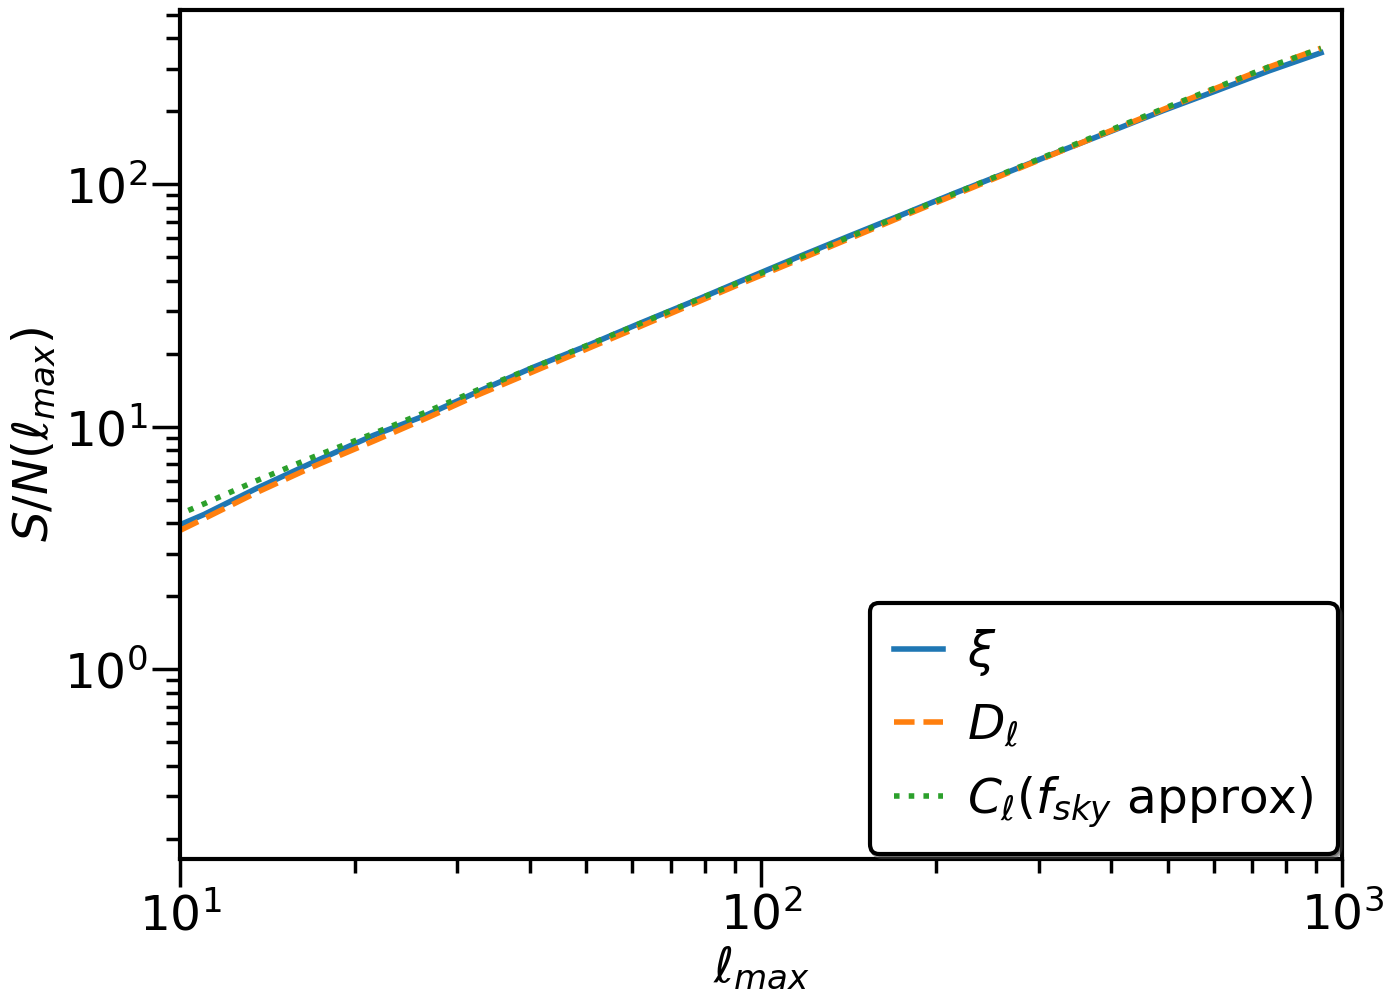

In [37]:
fig, ax =subplots(1,1,sharex='col',sharey='row')
x=lb_xi<=lb_cl.max()
ax.plot(lb_xi[x],cl_xi_SN[x],label=r'$\xi$')
ax.plot(lb_cl,cl_pcl_SN,'--',label='$D_\ell$')
ax.plot(lb_cl,cl_SN,':',label='$C_\ell(f_{sky}$ approx)')
ax.loglog()
# ax.set_xlim(lmin,1000)
ax.set_xlim(10,1000)
ax.set_xlabel(r'$\ell_{max}$')
ax.set_ylabel(r'$S/N(\ell_{max})$')
ax.legend(loc='lower right')
fname='iMaster_SN_'+corr_fnames[corr][s]
fname=fig_home+fname
if unit_window:
    fname+='unit_win'
fname+='.pdf'
if not test:
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    pass
print('saved to ',fname)    
show()

(0.9, 1.1)

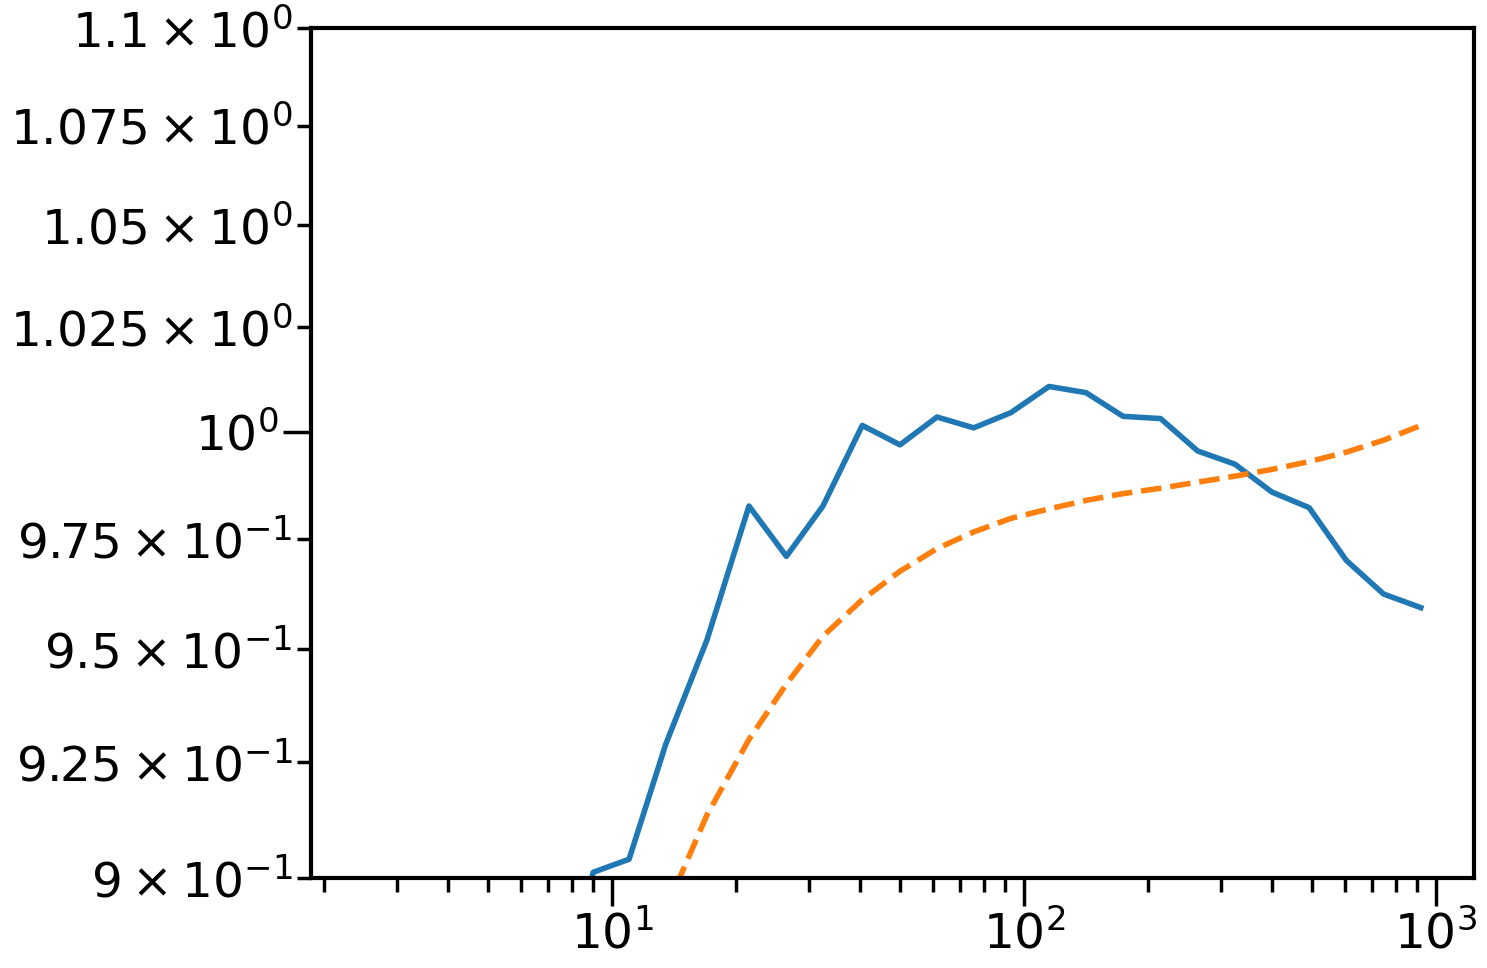

In [38]:
x=lb_xi<=lb_cl.max()
plot(lb_xi[x],cl_xi_SN[x]/cl_SN,label='$C_\ell(f_{sky}$ approx)')
plot(lb_cl,cl_pcl_SN/cl_SN,'--',label='$D_\ell$')
loglog()
ylim(0.9,1.1)

saved to  ./figures/iMaster_xi_cl_comp_gg.pdf


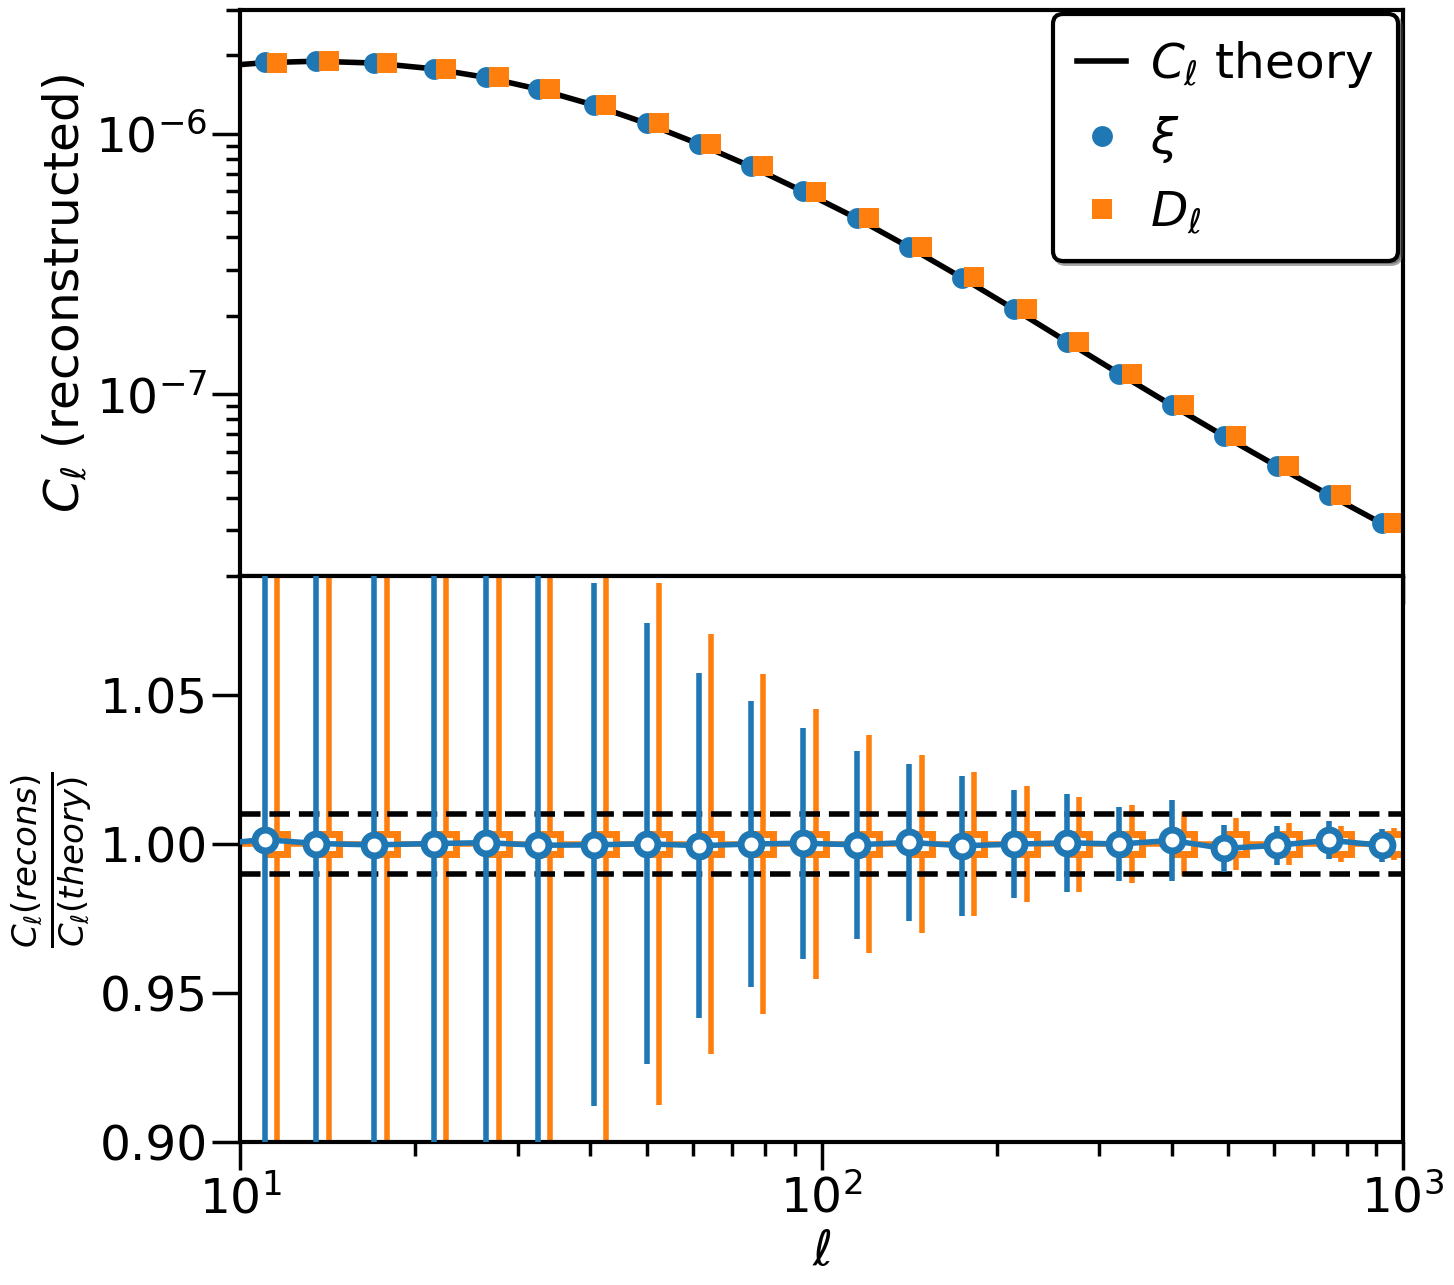

In [39]:
fig, ax =subplots(2,1,figsize=(15,15),sharex='col',sharey='row')
pS=ax[0]
pR=ax[1]
x=lb_xi<=lb_cl.max()
i=0
pS.errorbar(lb_xi[x],cl_xi[x],get_err(cl_xi_cov)[x],label=r'$\xi$',color=colors[i],marker=markers[i],lw=0,ms=15)
pR.errorbar(lb_xi[x],cl_xi[x]/cl,get_err(cl_xi_cov)[x]/cl,color=colors[i],marker=markers[i],mfc='white',mew=5,ms=15,zorder=10)

i+=1
pS.errorbar(lb_cl*1.05,cl_pcl,get_err(cl_pcl_cov),label='$D_\ell$',color=colors[i],marker=markers[i],lw=0,ms=15)
pR.errorbar(lb_cl*1.05,cl_pcl/cl,get_err(cl_pcl_cov)/cl,label='$D_\ell$',color=colors[i],marker=markers[i],mfc='white',mew=5,ms=15)

pS.plot(lb_cl,cl,'k-',label=r'$C_\ell$ theory')

pS.loglog()
pS.set_xlim(10,1000)
pS.set_ylim(2.e-8,3.e-6)
pR.set_ylim(0.9,1.09)
pR.hlines(1.01,10,1000,'k',ls='--')
pR.hlines(.99,10,1000,'k',ls='--')
pR.set_xlabel(r'$\ell$')
pS.set_ylabel(r'$C_\ell$ (reconstructed)')
pR.set_ylabel(r'$\frac{C_\ell (recons)}{C_\ell(theory)}$')
pS.legend()
fname='iMaster_xi_cl_comp_'+corr_fnames[corr][s]
fname=fig_home+fname
if unit_window:
    fname+='unit_win'
fname+='.pdf'
if not test:
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
    pass
print('saved to ',fname)    
show()

[]

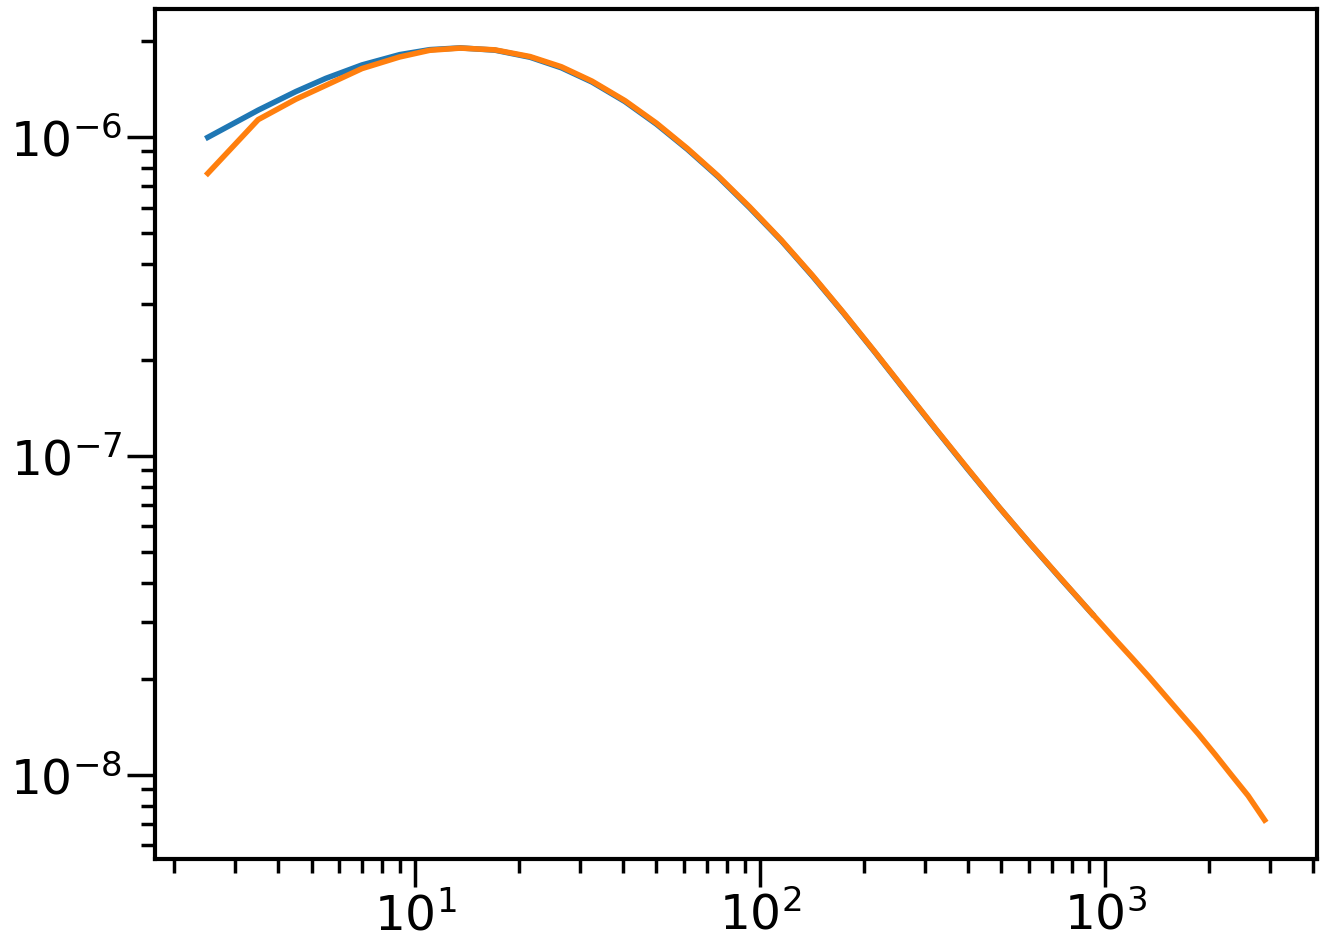

In [40]:
plot(lb_cl,cl0[corr][bi])
# plot(lb_cl,cl,':')
# plot(lb_cl,Mi@pcl0['pcl_b'])
plot(lb_xi,Wi@xiH0['xi'])
loglog()

<ipython-input-41-f99182128d36>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(lb_cl,lb_cl,corr_mat(cl_cov),vmin=-1,vmax=1,cmap='seismic')


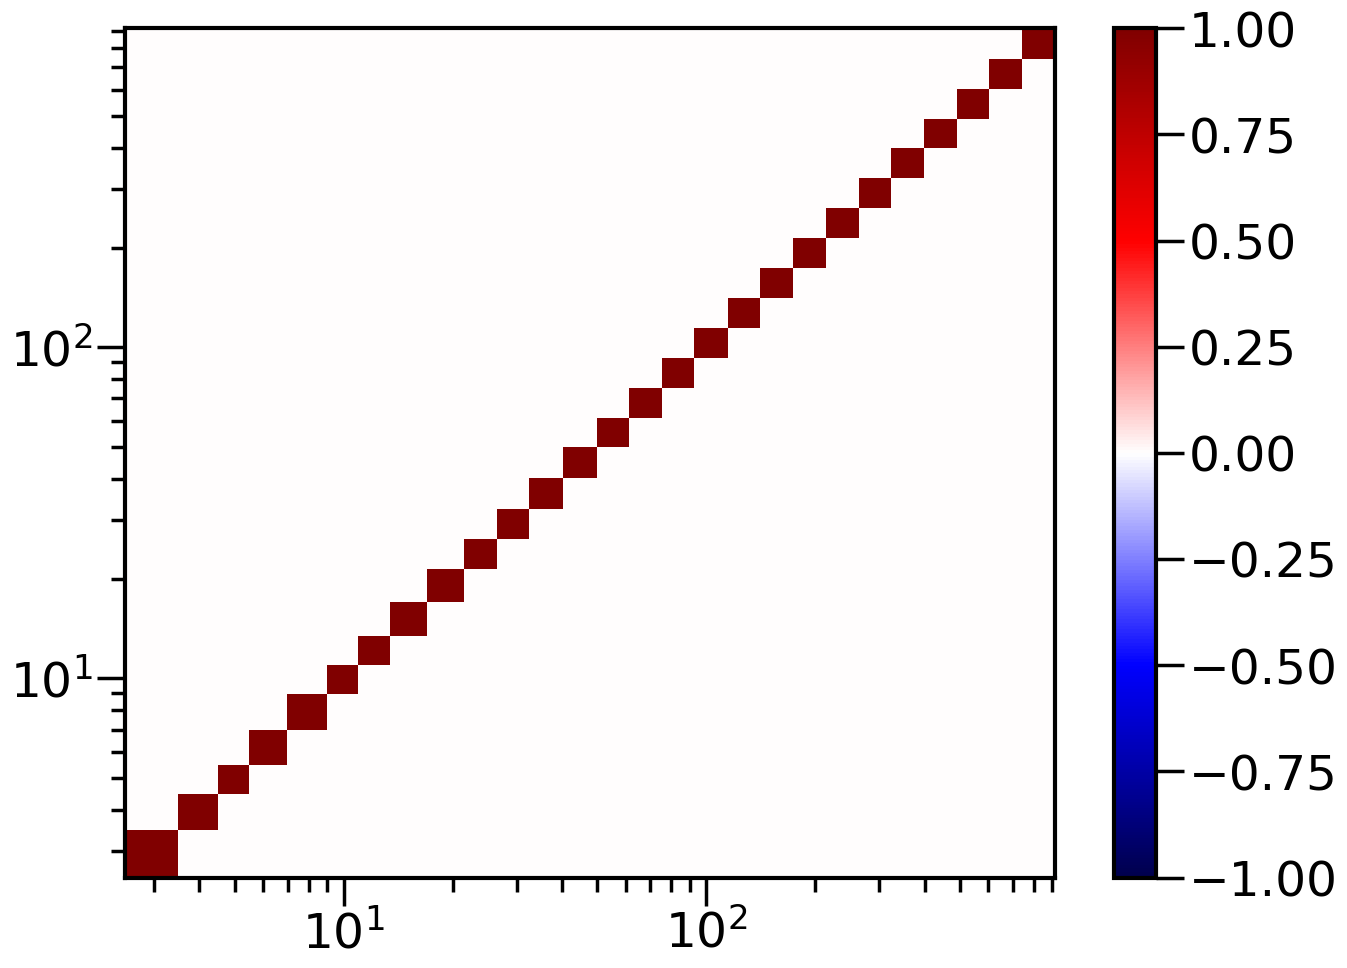

<ipython-input-41-f99182128d36>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(lb_xi,lb_xi,corr_mat(cl_xi_cov),vmin=-1,vmax=1,cmap='seismic')


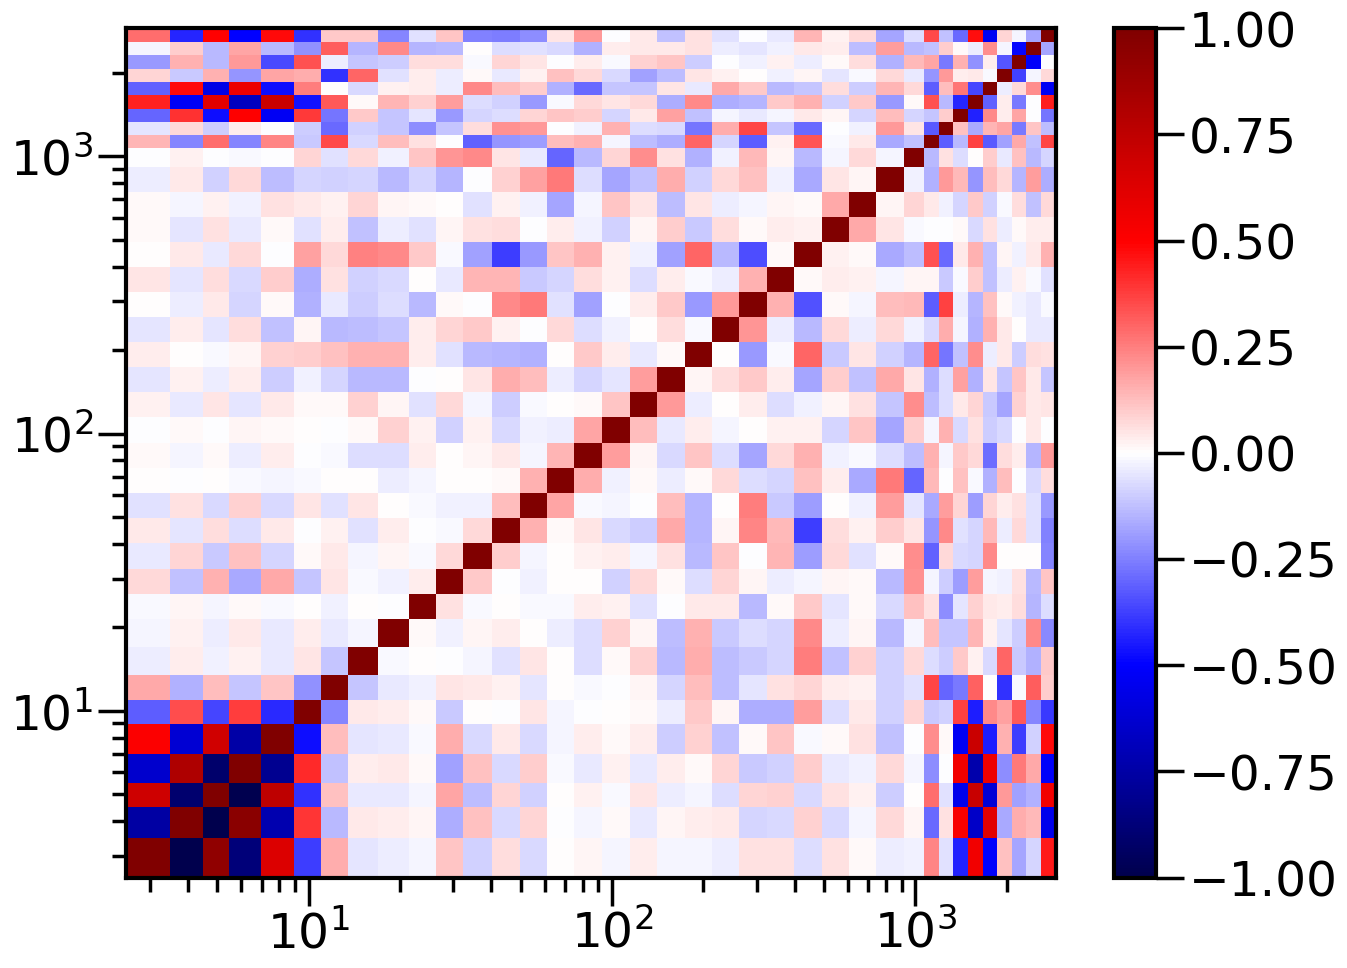

<ipython-input-41-f99182128d36>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(lb_cl,lb_cl,corr_mat(pcl0['cov'].todense()),vmin=-1,vmax=1,cmap='seismic')


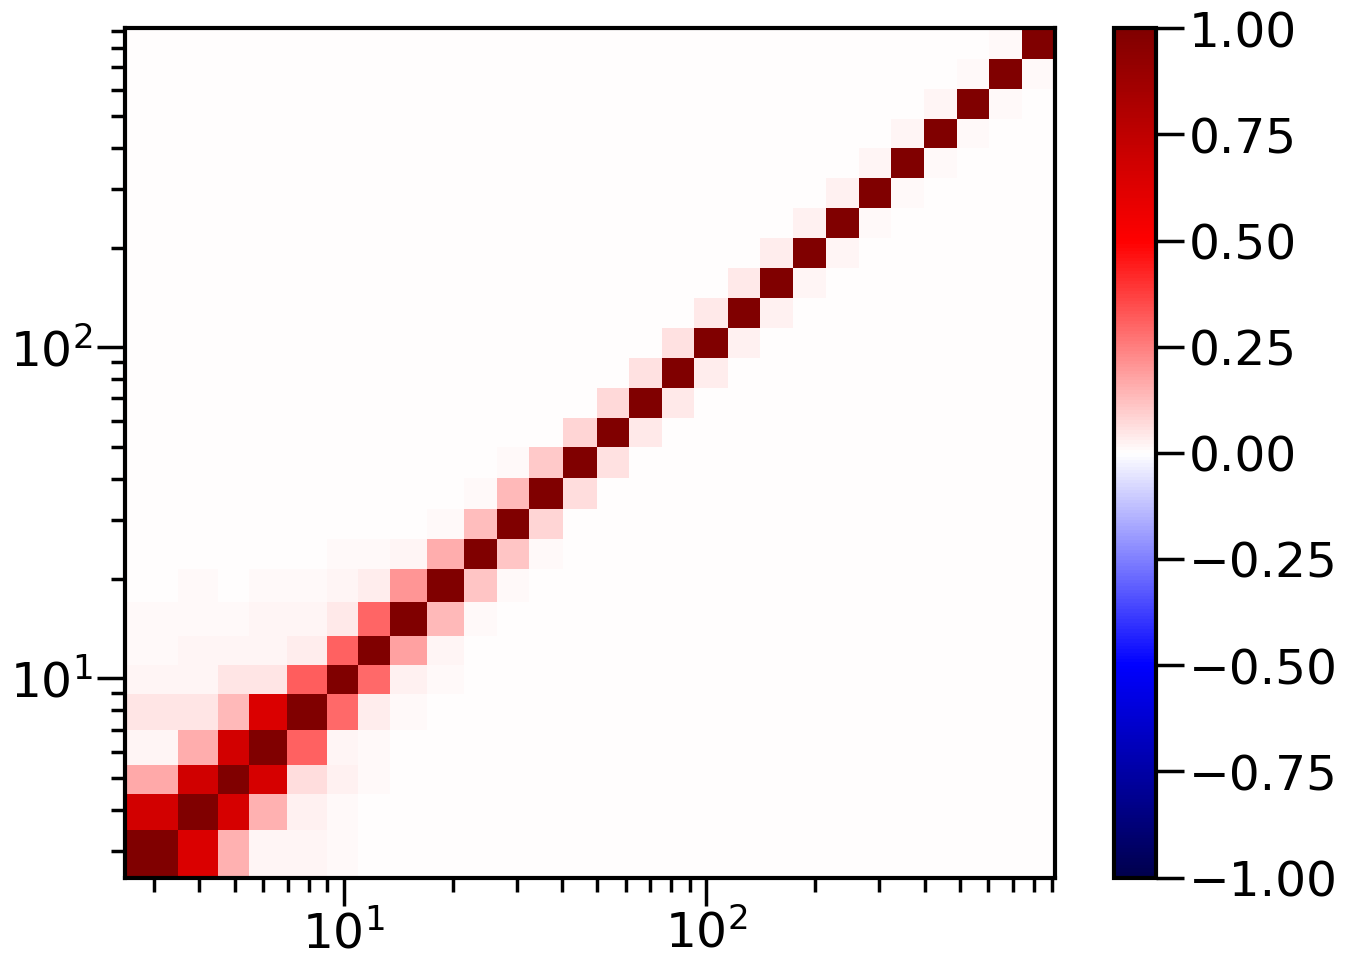

In [41]:
pcolor(lb_cl,lb_cl,corr_mat(cl_cov),vmin=-1,vmax=1,cmap='seismic')
colorbar()
loglog()
show()
pcolor(lb_xi,lb_xi,corr_mat(cl_xi_cov),vmin=-1,vmax=1,cmap='seismic')
colorbar()
loglog()
show()

pcolor(lb_cl,lb_cl,corr_mat(pcl0['cov'].todense()),vmin=-1,vmax=1,cmap='seismic')
colorbar()
loglog()
show()


(1, 918.5)

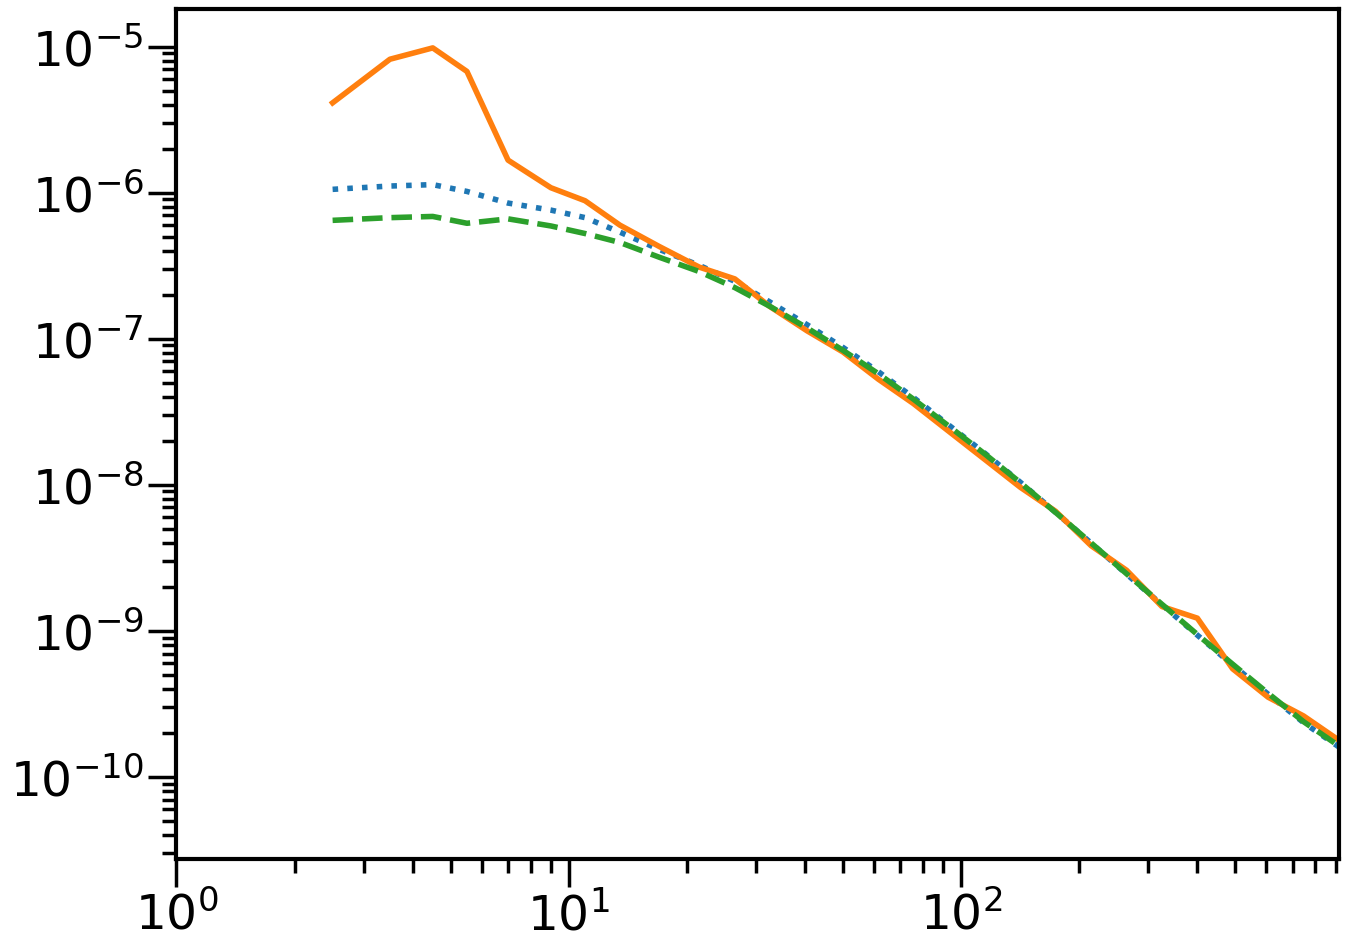

In [42]:
plot(lb_cl,get_err(cl_cov0),':')
plot(lb_xi,get_err(cl_xi_cov))
# plot(lb,get_err(cl_pcl_cov))
plot(lb_cl,get_err(pcl0['cov'].todense())/f_sky,'--')
loglog()
xlim(lmin,lb_cl.max())

<ipython-input-43-f269bb847d40>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(thb,thb,corr_mat(xiH0_ub['cov'].todense()),vmin=-1,vmax=1,cmap='seismic')


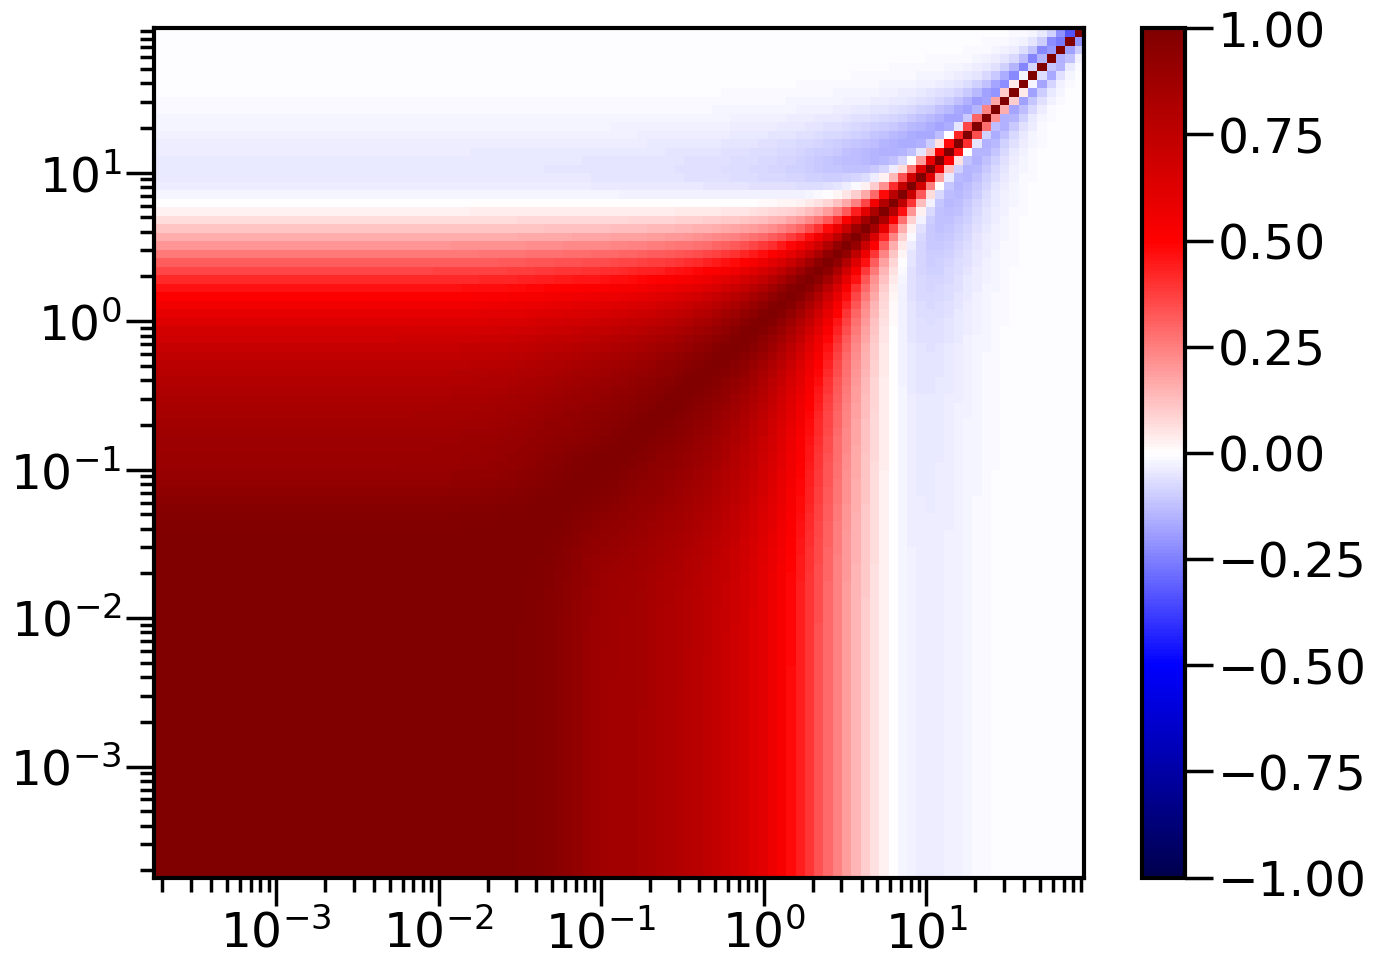

In [43]:
pcolor(thb,thb,corr_mat(xiH0_ub['cov'].todense()),vmin=-1,vmax=1,cmap='seismic')
colorbar()
loglog()
show()

In [44]:
thb

array([1.78399979e-04, 2.03518652e-04, 2.32174028e-04, 2.64864074e-04,
       3.02156870e-04, 3.44700483e-04, 3.93234225e-04, 4.48601507e-04,
       5.11764488e-04, 5.83820801e-04, 6.66022626e-04, 7.59798447e-04,
       8.66777880e-04, 9.88819991e-04, 1.12804560e-03, 1.28687414e-03,
       1.46806570e-03, 1.67476899e-03, 1.91057605e-03, 2.17958469e-03,
       2.48646967e-03, 2.83656399e-03, 3.23595149e-03, 3.69157266e-03,
       4.21134518e-03, 4.80430154e-03, 5.48074601e-03, 6.25243369e-03,
       7.13277481e-03, 8.13706773e-03, 9.28276486e-03, 1.05897759e-02,
       1.20808137e-02, 1.37817892e-02, 1.57222618e-02, 1.79359523e-02,
       2.04613300e-02, 2.33422802e-02, 2.66288675e-02, 3.03782054e-02,
       3.46554492e-02, 3.95349279e-02, 4.51014360e-02, 5.14517070e-02,
       5.86960946e-02, 6.69604902e-02, 7.63885106e-02, 8.71439940e-02,
       9.94138468e-02, 1.13411292e-01, 1.29379574e-01, 1.47596186e-01,
       1.68377692e-01, 1.92085230e-01, 2.19130782e-01, 2.49984342e-01,
      

[]

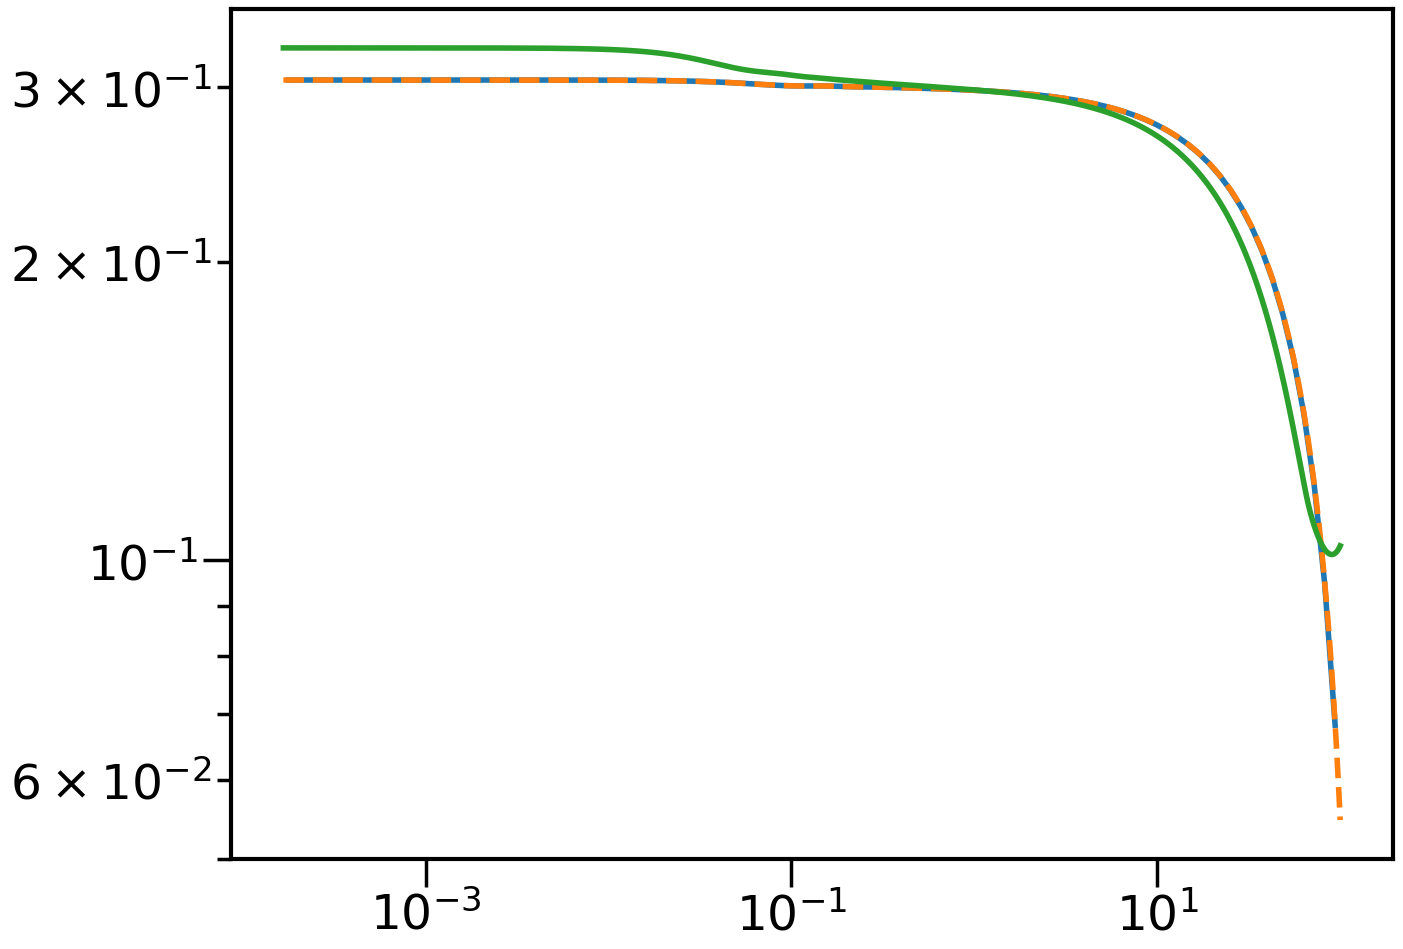

In [45]:
plot(thb,SL_xi0_ub.Win['cl'][corr][bi]['xi_b'])
plot(th,SL_xi0_ub.Win['cl'][corr][bi]['xi'],'--')
plot(th,np.diag(SL_xi0_ub.Win['cov'][corr+corr][bi+bi]['xi_cov'][1324]['clcl']))
loglog()